In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from matplotlib.colors import LinearSegmentedColormap

def rollavg_pandas(a,n):
        'Pandas rolling average over data set a with window size n. Returns a centered np array of same size'
        return np.ravel(pd.DataFrame(a).rolling(n, center=True, min_periods=1).mean().to_numpy())

In [2]:
def load_data(model_number):
    file = r"/Users/Chantal/Documents/Deep-QLearning-Agent-for-Traffic-Signal-Control/new_tests/"+str(model_number)+"/plot_greedy_reward_data.txt"
    data = np.loadtxt(file)
    
    
    #only take every 4th row --> delete once fixed!
    data = data[0::4]
    
    global min_val
    global max_val
    
    global number_runs 
    number_runs = len(data)
    
    min_val = np.amin(data)
    max_val = np.amax(data)
    
    return data

In [7]:
def plot(model_number):
    data = load_data(model_number)
    
    
    episodes = np.arange(0,number_runs*15,15)    #may need to change the 15!
    
    
    
    # PLOT 
    plt.style.use('ggplot')
    plt.rcParams.update({'font.size': 14})  # set bigger font size
    fig, ax = plt.subplots()
    plt.title("Total reward per episode when only using greedy policies")
    
    
    plt.plot(episodes, data[:,0], c='orange', label="low traffic scenario")
    plt.plot(episodes, data[:,1], c='red', label="medium traffic scenario")
    plt.plot(episodes, data[:,2], c='green', label="high traffic scenario")
    plt.plot(episodes, data[:,3], c='blue', label="dynamic traffic scenario")
    
    
    legend = ax.legend(loc='best', shadow=True, fontsize='medium')
    plt.xlabel('Episode')
    plt.ylabel('Total reward')

    plt.margins(0)


#     plt.xlim(0, 1)
    plt.ylim(min_val - 0.05 * abs(min_val), max_val + 0.05 * abs(max_val))
    fig = plt.gcf()
    fig.set_size_inches(20, 11.25)
    plt.show()
    
    save_file = r"/Users/Chantal/Documents/Deep-QLearning-Agent-for-Traffic-Signal-Control/new_tests/"+ \
                "plot_reward_greedy_episodes_model_"+str(model_number)+".png"
    fig.savefig(save_file)


    

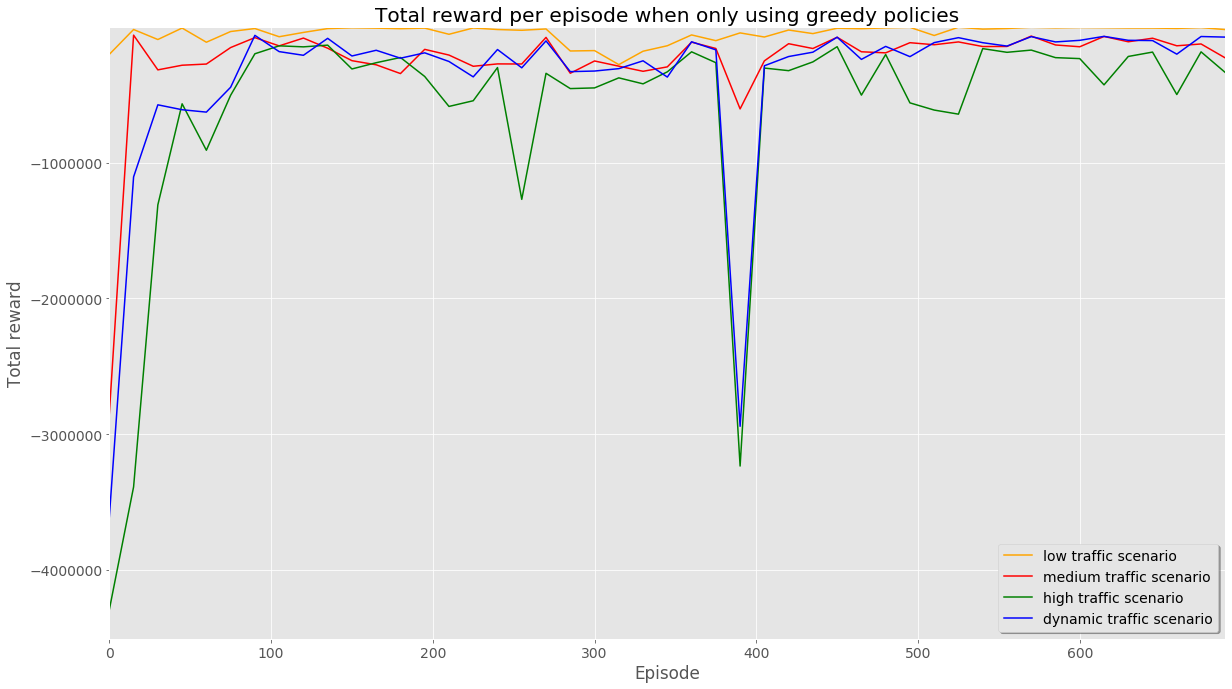

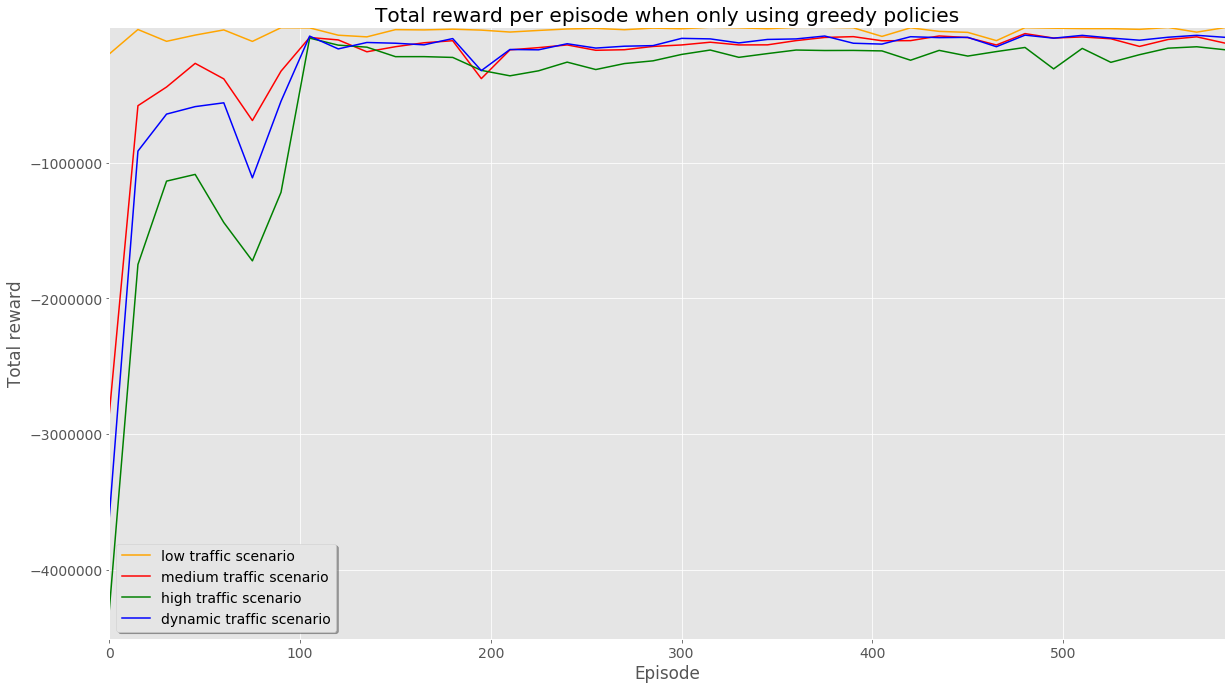

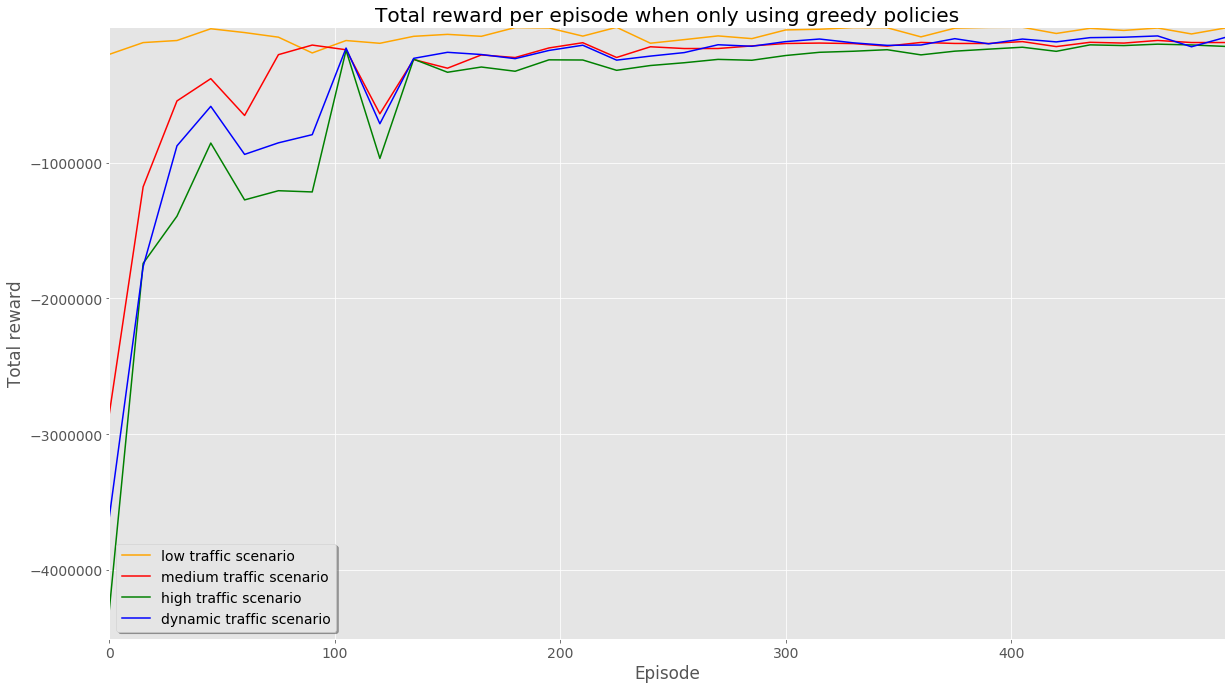

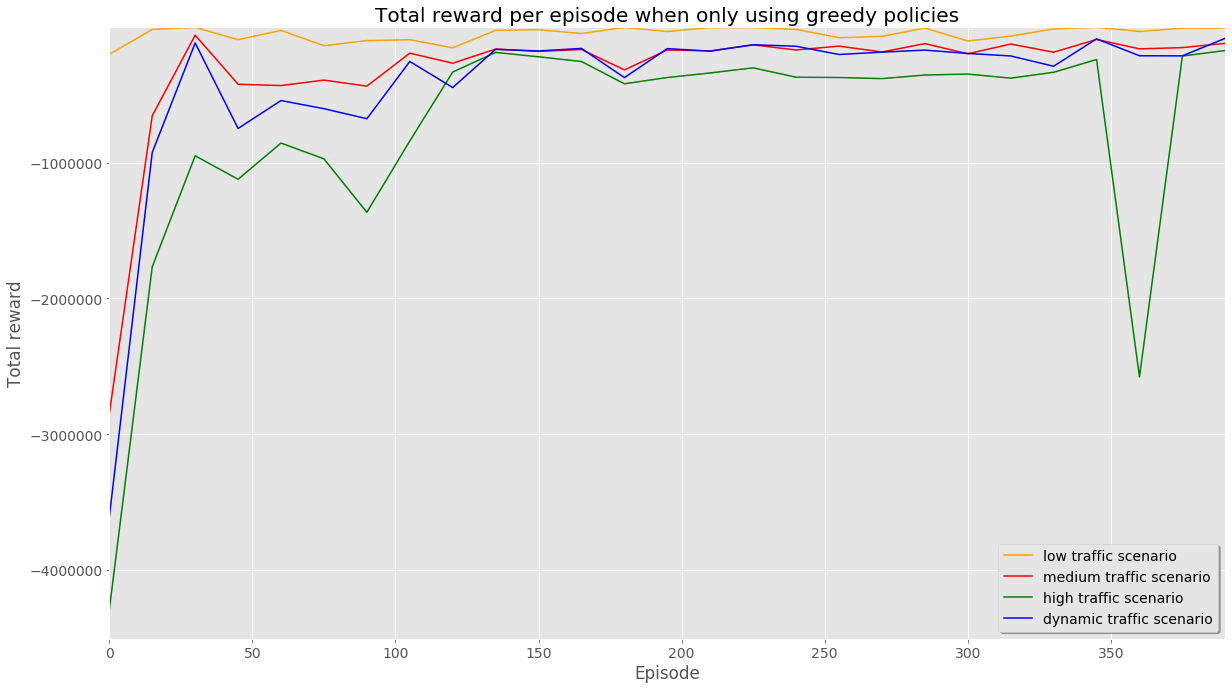

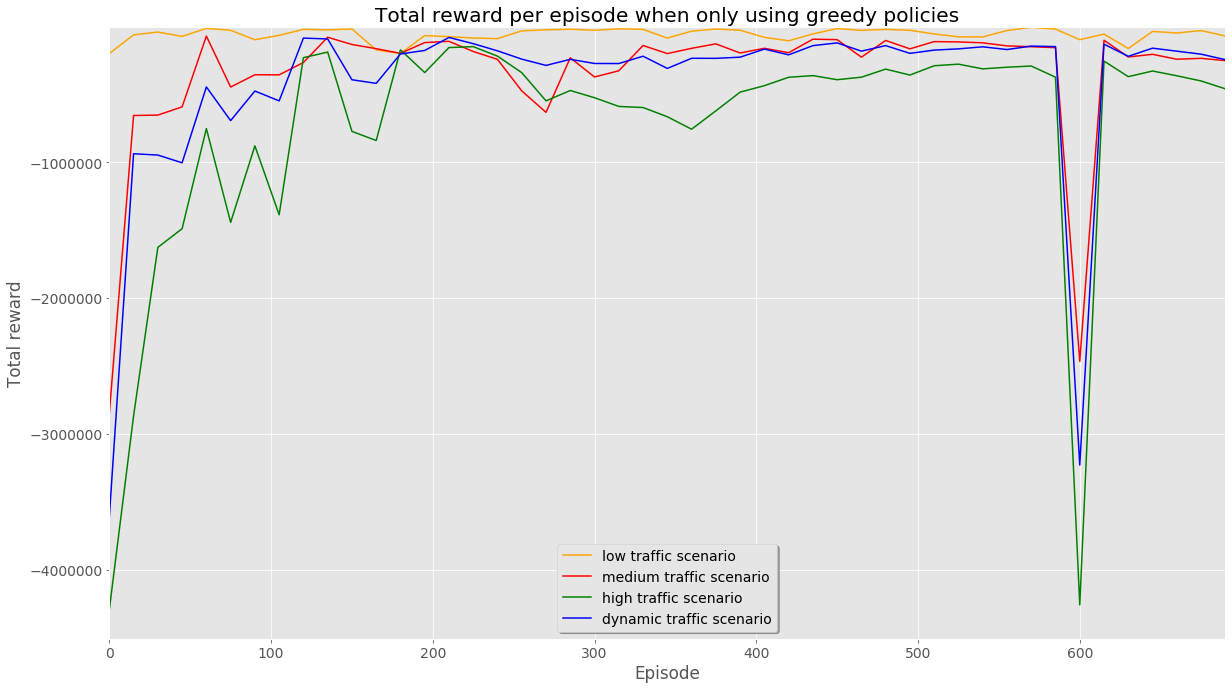

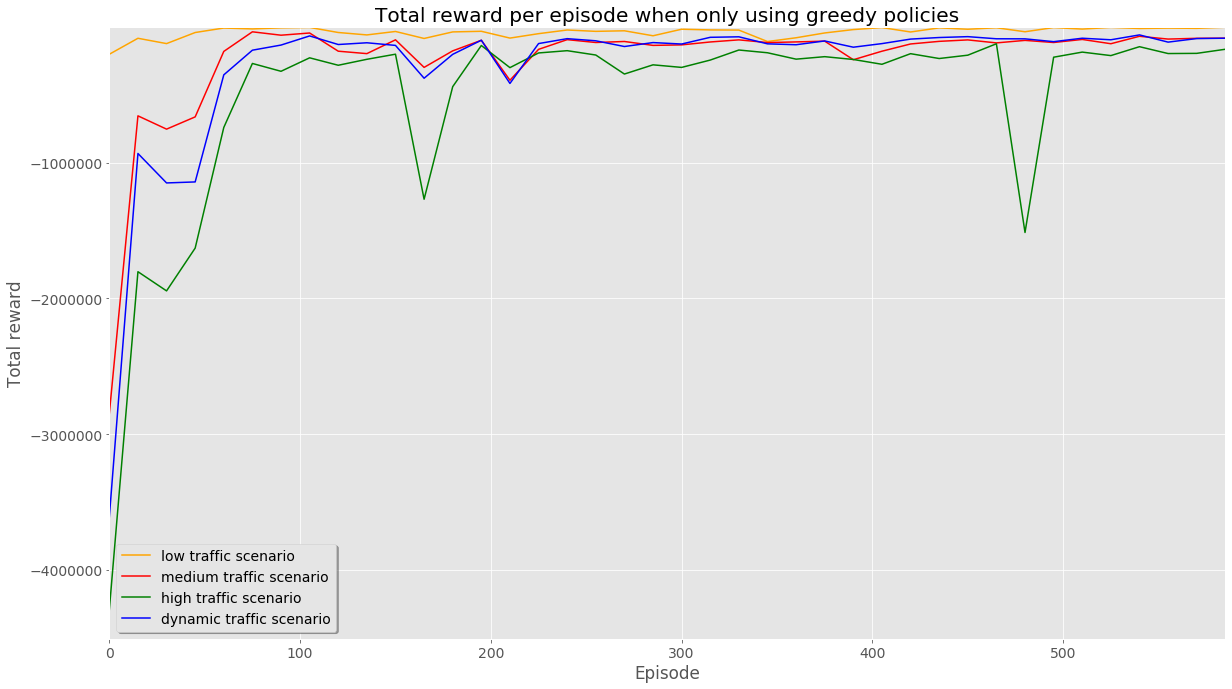

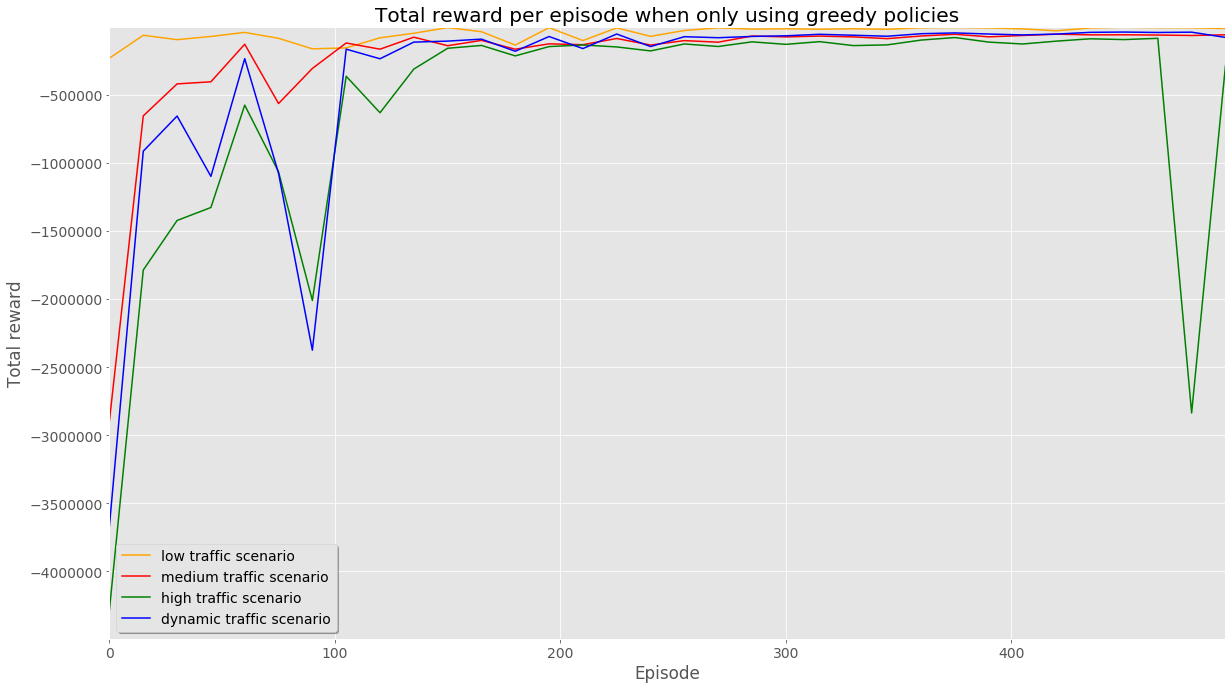

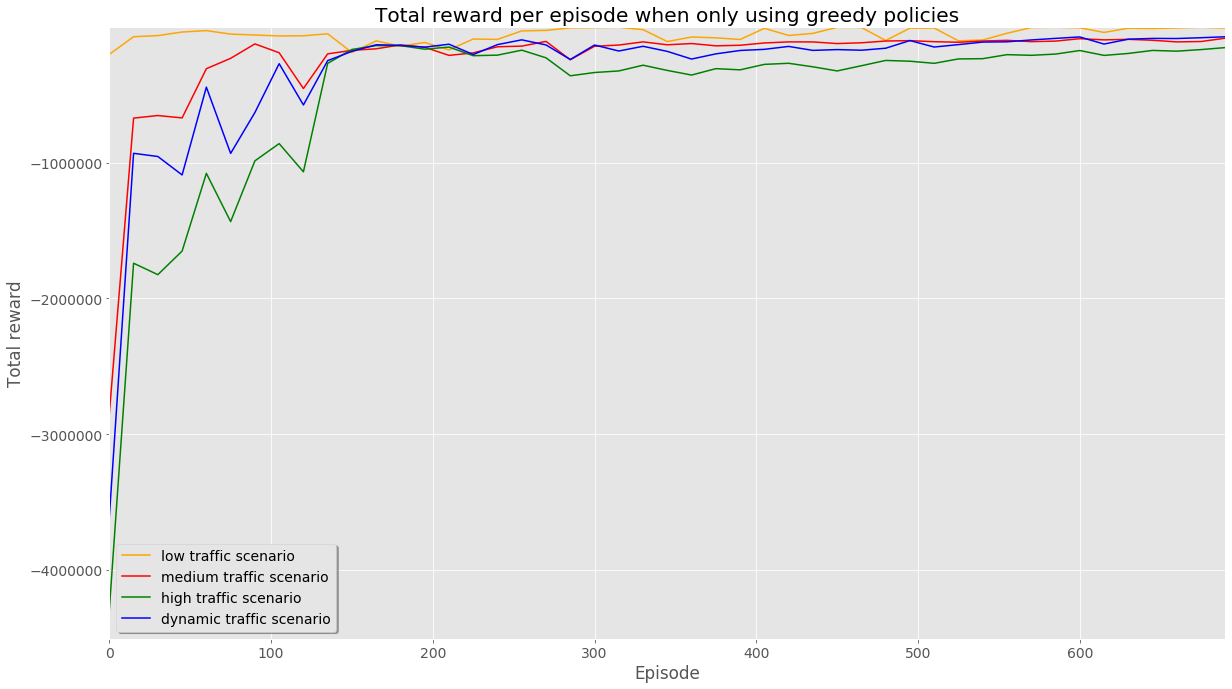

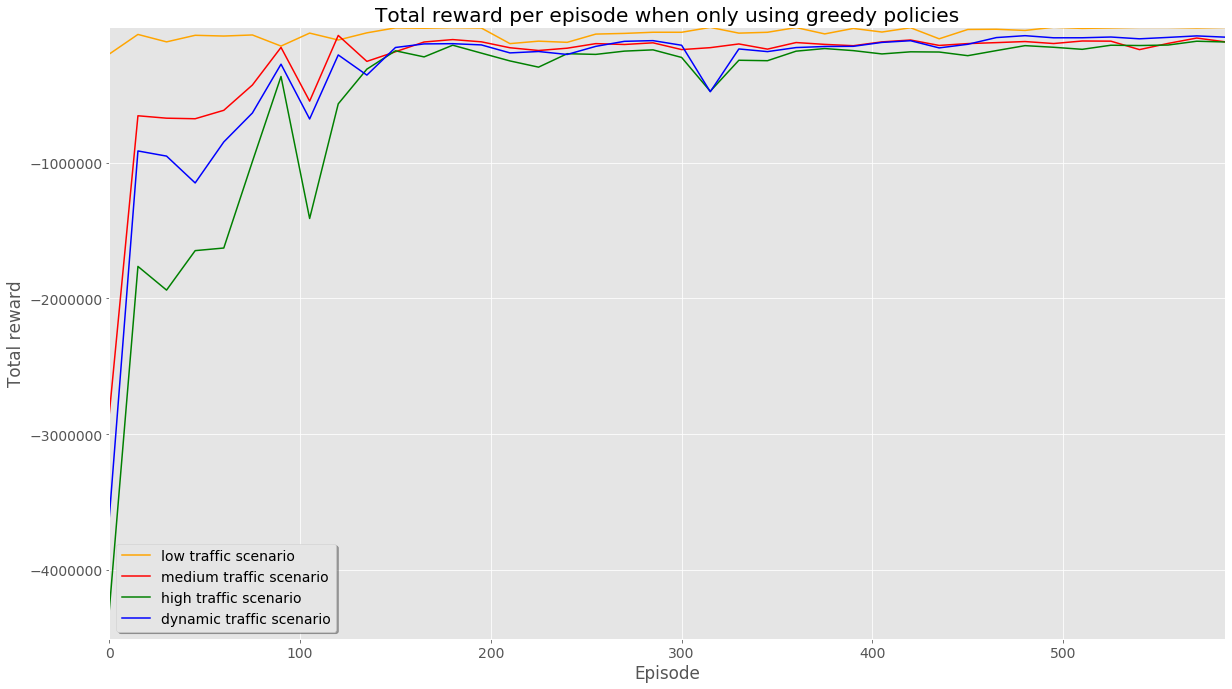

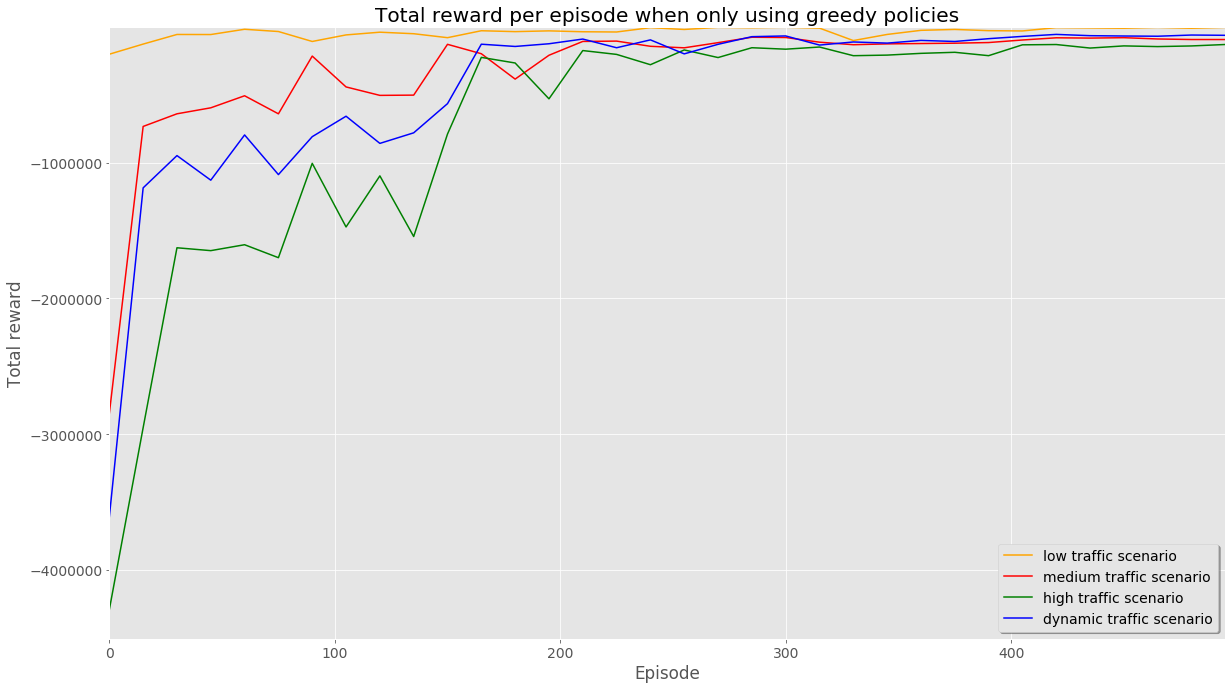

In [11]:
# plot(44)

for x in range(35,45):
    plot(x)


In [61]:
def get_scenario_label(scenario):
    if scenario == 0:
        s_type = "low traffic scenario"
    elif scenario == 1:
        s_type = "medium traffic scenario"
    elif scenario == 2:
        s_type = "high traffic scenario"
    elif scenario == 3:
        s_type = "dynamic traffic scenario"
    else:
        s_type = None
    return s_type

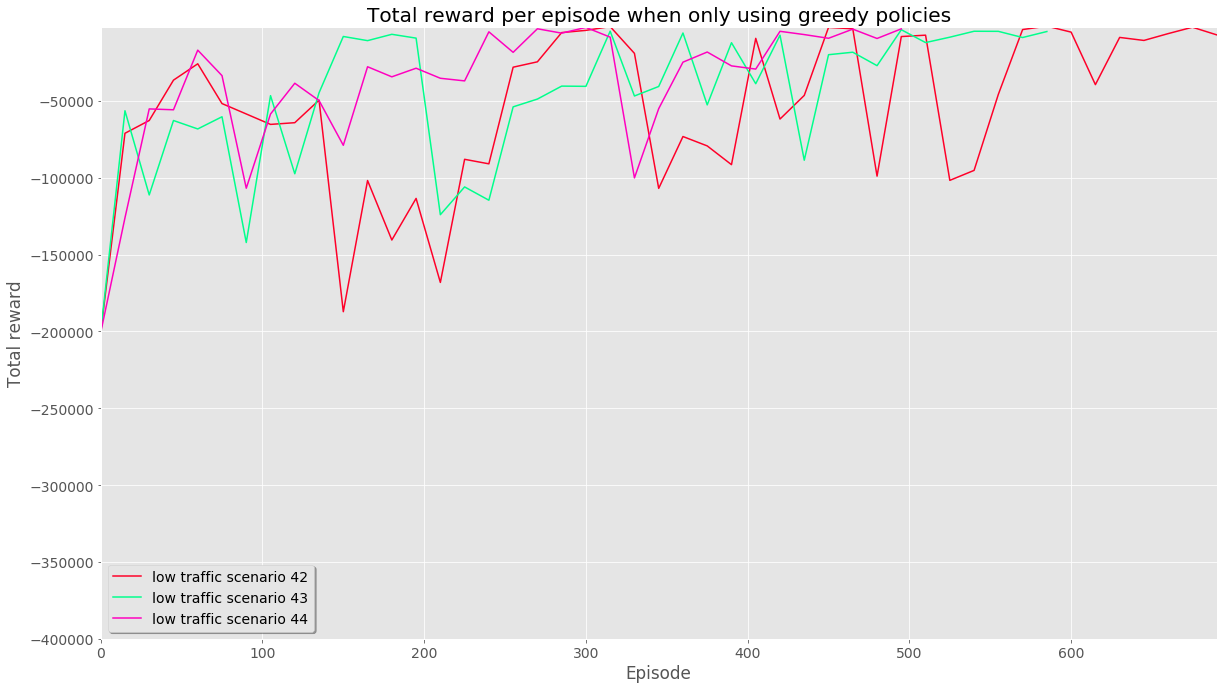

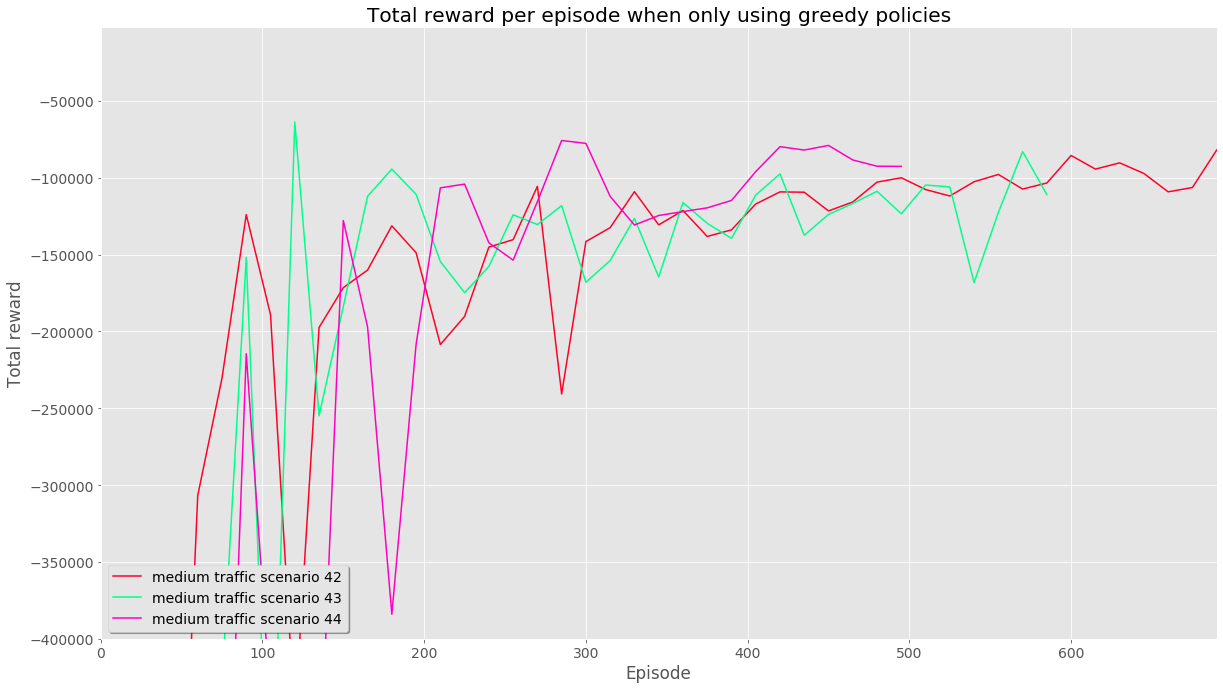

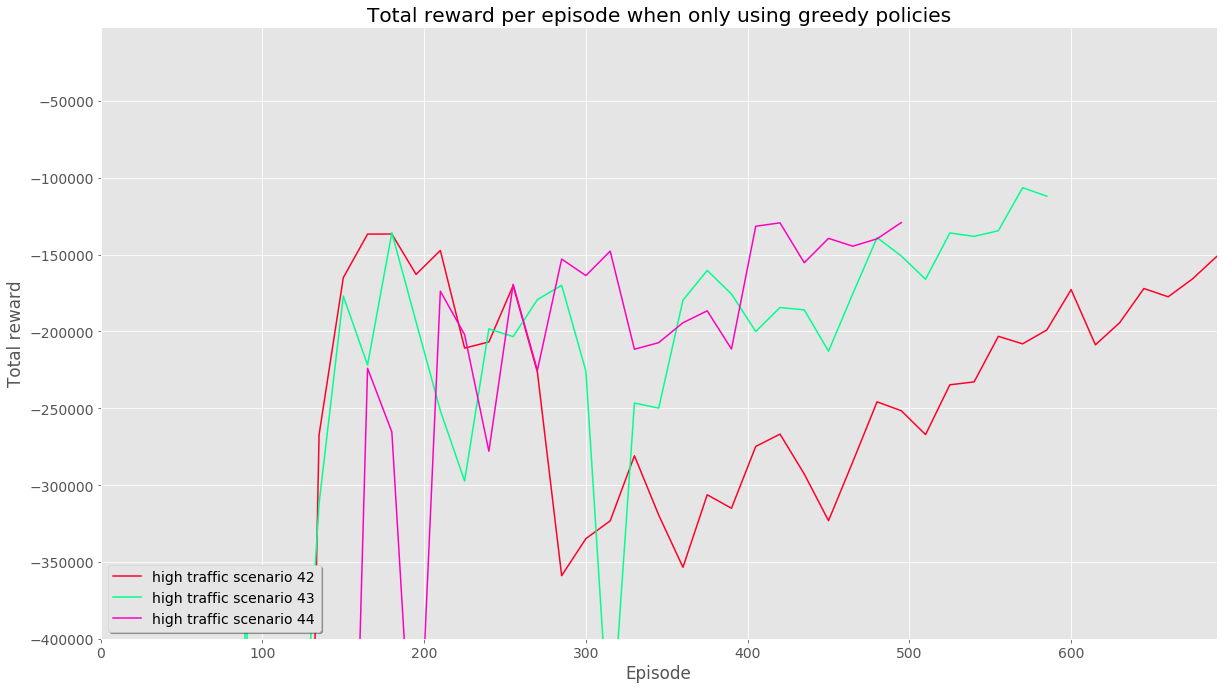

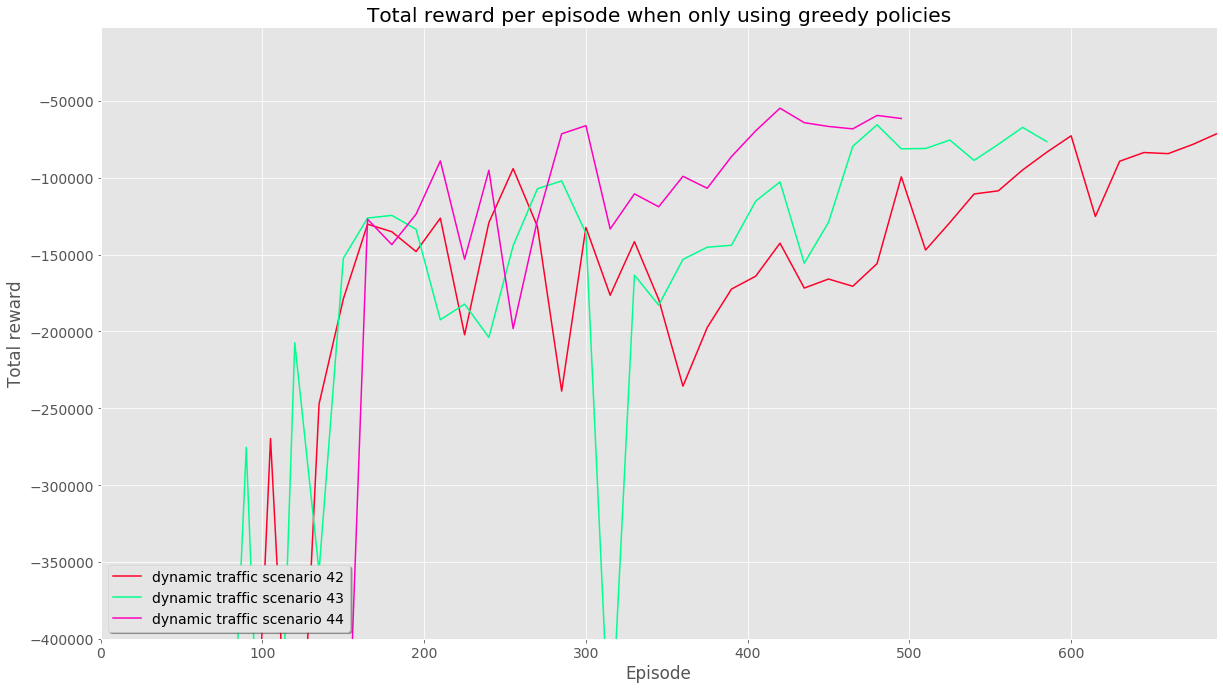

In [85]:
def plot_most_important_values(model_numbers_list):   

    for scenario in range(4):
    
    
        plt.style.use('ggplot')
        plt.rcParams.update({'font.size': 14})  # set bigger font size
        fig, ax = plt.subplots()
        plt.title("Total reward per episode when only using greedy policies")


        colors = plt.cm.gist_rainbow(np.linspace(0,1,len(model_numbers_list)))   

        for model_index, model_number in enumerate(model_numbers_list):
            color=colors[model_index]
        

#             if model_number == 35 or model_number == 36 or model_number == 37 or model_number == 38:
#                 color = 'blue'
#             elif model_number == 39 or model_number == 40 or model_number == 41:
#                 color = 'green'
#             elif model_number == 42 or model_number == 43 or model_number == 44:
#                 color = 'red'
        
            data = load_data(model_number)
            episodes = np.arange(0,number_runs*15,15)    #may need to change the 15!

            #reshape to 100% of all episodes
#             episodes = np.linspace(0,100,number_runs)


            plt.plot(episodes, data[:,scenario], c=color, label=get_scenario_label(scenario)+" "+str(model_number))
#             plt.plot(episodes, data[:,1], c=colors[model_index], label="medium traffic scenario "+str(model_number))
#             plt.plot(episodes, data[:,2], c=colors[model_index], label="high traffic scenario "+str(model_number))
#             plt.plot(episodes, data[:,3], c=colors[model_index], label="dynamic traffic scenario "+str(model_number))


        legend = ax.legend(loc='lower left', shadow=True, fontsize='medium')
        plt.xlabel('Episode')
        plt.ylabel('Total reward')
        plt.margins(0)


    #     plt.xlim(0, 1)
        plt.ylim(-400000, max_val + 0.05 * abs(max_val))
        fig = plt.gcf()
        fig.set_size_inches(20, 11.25)
        plt.show()
    
        save_file = r"/Users/Chantal/Documents/Deep-QLearning-Agent-for-Traffic-Signal-Control/new_tests/"+ \
                    "compare_plots_reward_greedy_episodes_model_scenario"+str(scenario)+".png"
        fig.savefig(save_file)


plot_most_important_values([42,43,44])    
# plot_most_important_values(range(35,45))    